# New section

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


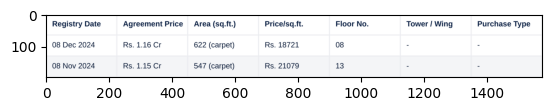

OC Output:

Registry Date Agreement Price Area (sq.ft.) Price/sq. ft. Floor No. Tower } Wing Purchase Type
08 Dec 2024 Rs. 1.16 Cr 622 (carpet) Rs. 18721 08 - -
08 Nov 2024 Rs. 1.15 Cr 547 (carpet) Rs. 21079 13 ~ ~

  Registry Date Agreement Price Area (sq.ft.) Price/sq.ft. Floor No.  \
0   08 Dec 2024     Rs. 1.16 Cr  622 (carpet)    Rs. 18721        08   

  Tower / Wing Purchase Type  
0            -             -  
  Registry Date Agreement Price Area (sq.ft.) Price/sq.ft. Floor No.  \
0   08 Dec 2024     Rs. 1.16 Cr  622 (carpet)    Rs. 18721        08   
1   08 Nov 2024     Rs. 1.15 Cr  547 (carpet)    Rs. 21079        13   

  Tower / Wing Purchase Type  
0            -             -  
1            -             -  


In [10]:
!pip install pytesseract
!apt install tesseract-ocr
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

image_path = list(uploaded.keys())[0]
img = cv2.imread('/content/In Om Sai Veer Siddhanak Chs, Kurla East, Mumbai-page_1 (1).png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(thresh, config=custom_config)
print("OC Output:\n")
print(text)
lines = [line.strip() for line in text.split('\n')]
rows =[]
date_pattern = re.compile(r"\d{2} \w{3} \d{4}")
for line in lines:
  if date_pattern.search(line):
    rows.append(line)
columns = ['Registry Date', 'Agreement Price', 'Area (sq.ft.)', 'Price/sq.ft.', 'Floor No.', 'Tower / Wing', 'Purchase Type']
structured_data = []
for row in rows:
  date_match = date_pattern.search(row)
  if not date_match:
    continue
  date = date_match.group()
  rest = row.replace(date, '').strip()
  price = re.search(r'Rs\.? ?[\d.]+ ?Cr', rest)
  area = re.search(r'\d{3} ?\(carpet\)', rest)
  rate = re.search(r'Rs\.? ?\d{4,6}', rest)
  floor = re.search(r'\b\d{1,2}\b', rest.split(rate.group() if rate else '')[-1]) if rate else None
  structured_data.append([
      date,
      price.group() if price else '',
      area.group() if area else '',
      rate.group() if rate else '',
      floor.group() if floor else '',
      '-', #Tower/Wing
      '-'  #Purchase Type
  ])
  df = pd.DataFrame(structured_data, columns=columns)
  print(df)